IMPORT LIABARIES

In [32]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import  MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,r2_score

import the dataframe 

In [33]:
df=pd.read_csv(r"D:\\DATA ANALYTICS\\DATA SET\\GOOG.csv")

In [34]:
print(df.head(10))

         Date      Open      High       Low     Close  Adj Close     Volume
0  2004-08-19  2.490664  2.591785  2.390042  2.499133   2.499133  897427216
1  2004-08-20  2.515820  2.716817  2.503118  2.697639   2.697639  458857488
2  2004-08-23  2.758411  2.826406  2.716070  2.724787   2.724787  366857939
3  2004-08-24  2.770615  2.779581  2.579581  2.611960   2.611960  306396159
4  2004-08-25  2.614201  2.689918  2.587302  2.640104   2.640104  184645512
5  2004-08-26  2.613952  2.688672  2.606729  2.687676   2.687676  142572401
6  2004-08-27  2.692408  2.705360  2.632383  2.643840   2.643840  124826132
7  2004-08-30  2.622171  2.627402  2.540727  2.540727   2.540727  104429967
8  2004-08-31  2.547950  2.583068  2.544463  2.549693   2.549693   98825037
9  2004-09-01  2.557912  2.564637  2.482445  2.496891   2.496891  183633734


In [35]:
print(df.tail(10))

            Date        Open        High         Low       Close   Adj Close  \
4848  2023-11-21  137.940002  138.964996  137.705002  138.619995  138.619995   
4849  2023-11-22  139.100006  141.100006  139.000000  140.020004  140.020004   
4850  2023-11-24  139.539993  139.677002  137.470001  138.220001  138.220001   
4851  2023-11-27  137.570007  139.630005  137.539993  138.050003  138.050003   
4852  2023-11-28  137.630005  138.660004  137.039993  138.619995  138.619995   
4853  2023-11-29  138.985001  139.669998  136.294998  136.399994  136.399994   
4854  2023-11-30  136.399994  136.960007  132.789993  133.919998  133.919998   
4855  2023-12-01  133.320007  133.500000  132.151993  133.320007  133.320007   
4856  2023-12-04  131.294006  131.449997  129.399994  130.630005  130.630005   
4857  2023-12-05  130.369995  133.539993  129.729996  132.389999  132.389999   

        Volume  
4848  17648100  
4849  17306400  
4850   8828600  
4851  17886400  
4852  17046900  
4853  21014700  


In [36]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4858 entries, 0 to 4857
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4858 non-null   object 
 1   Open       4858 non-null   float64
 2   High       4858 non-null   float64
 3   Low        4858 non-null   float64
 4   Close      4858 non-null   float64
 5   Adj Close  4858 non-null   float64
 6   Volume     4858 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 265.8+ KB
None


In [37]:
print(df.isna().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [38]:
print(df.isna().sum().sum())

0


In [39]:
df.dropna(inplace=True)

In [40]:
print(df.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
4853    False
4854    False
4855    False
4856    False
4857    False
Length: 4858, dtype: bool


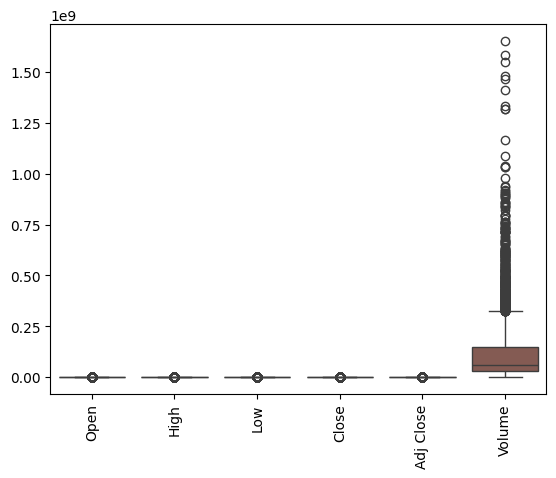

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=df) 
plt.xticks(rotation=90)
plt.show()

In [42]:
df["z_score"]=(df["Volume"]-df["Volume"].mean())/df["Volume"].std()
threshold=1
df_no_outliers=df[df["z_score"].abs()<=threshold]
df=df_no_outliers.drop(columns=["z_score"])
print(df)

            Date        Open        High         Low       Close   Adj Close  \
4     2004-08-25    2.614201    2.689918    2.587302    2.640104    2.640104   
5     2004-08-26    2.613952    2.688672    2.606729    2.687676    2.687676   
6     2004-08-27    2.692408    2.705360    2.632383    2.643840    2.643840   
7     2004-08-30    2.622171    2.627402    2.540727    2.540727    2.540727   
8     2004-08-31    2.547950    2.583068    2.544463    2.549693    2.549693   
...          ...         ...         ...         ...         ...         ...   
4853  2023-11-29  138.985001  139.669998  136.294998  136.399994  136.399994   
4854  2023-11-30  136.399994  136.960007  132.789993  133.919998  133.919998   
4855  2023-12-01  133.320007  133.500000  132.151993  133.320007  133.320007   
4856  2023-12-04  131.294006  131.449997  129.399994  130.630005  130.630005   
4857  2023-12-05  130.369995  133.539993  129.729996  132.389999  132.389999   

         Volume  
4     184645512  
5  

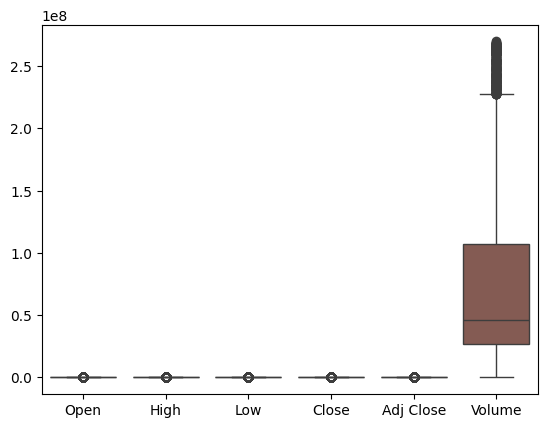

In [43]:
sns.boxplot(data=df)
plt.show()

In [44]:
cor=df.corr(numeric_only=True)
print(cor)

               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999894  0.999887  0.999754   0.999754 -0.603724
High       0.999894  1.000000  0.999866  0.999885   0.999885 -0.602630
Low        0.999887  0.999866  1.000000  0.999895   0.999895 -0.605219
Close      0.999754  0.999885  0.999895  1.000000   1.000000 -0.604154
Adj Close  0.999754  0.999885  0.999895  1.000000   1.000000 -0.604154
Volume    -0.603724 -0.602630 -0.605219 -0.604154  -0.604154  1.000000


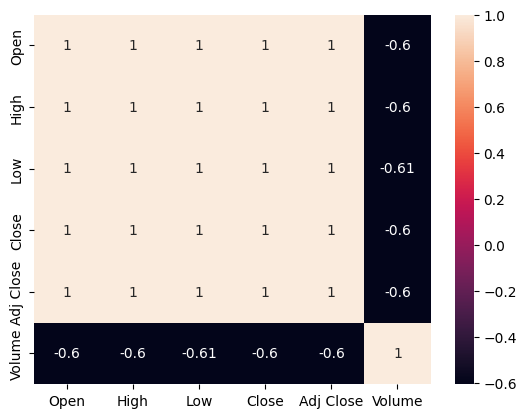

In [45]:
sns.heatmap(cor,annot=True)
plt.show()

In [46]:
print(df.cov(numeric_only=True))

                   Open          High           Low         Close  \
Open       1.527242e+03  1.544907e+03  1.510945e+03  1.527926e+03   
High       1.544907e+03  1.563106e+03  1.528550e+03  1.545965e+03   
Low        1.510945e+03  1.528550e+03  1.495161e+03  1.512008e+03   
Close      1.527926e+03  1.545965e+03  1.512008e+03  1.529364e+03   
Adj Close  1.527926e+03  1.545965e+03  1.512008e+03  1.529364e+03   
Volume    -1.519242e+09 -1.534192e+09 -1.506923e+09 -1.521382e+09   

              Adj Close        Volume  
Open       1.527926e+03 -1.519242e+09  
High       1.545965e+03 -1.534192e+09  
Low        1.512008e+03 -1.506923e+09  
Close      1.529364e+03 -1.521382e+09  
Adj Close  1.529364e+03 -1.521382e+09  
Volume    -1.521382e+09  4.146387e+15  


In [47]:
print(df.std(numeric_only=True))

Open         3.907994e+01
High         3.953613e+01
Low          3.866731e+01
Close        3.910708e+01
Adj Close    3.910708e+01
Volume       6.439244e+07
dtype: float64


In [48]:
print(df.describe())

              Open         High          Low        Close    Adj Close  \
count  4295.000000  4295.000000  4295.000000  4295.000000  4295.000000   
mean     45.723493    46.201687    45.269179    45.744676    45.744676   
std      39.079944    39.536132    38.667310    39.107085    39.107085   
min       2.509095     2.534002     2.473728     2.490913     2.490913   
25%      14.455318    14.582840    14.327423    14.456563    14.456563   
50%      29.394073    29.616138    29.120050    29.382830    29.382830   
75%      60.795499    61.310451    60.245498    60.825501    60.825501   
max     151.863495   152.100006   149.887497   150.709000   150.709000   

             Volume  
count  4.295000e+03  
mean   7.588619e+07  
std    6.439244e+07  
min    1.584340e+05  
25%    2.687500e+07  
50%    4.627000e+07  
75%    1.071682e+08  
max    2.698637e+08  


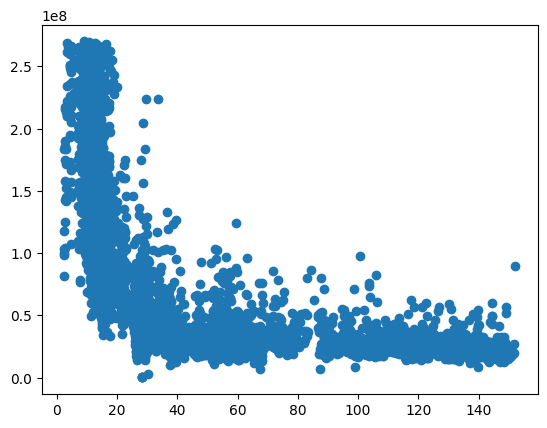

In [49]:

x=df.iloc[:,4].values
y=df["Volume"]
x=pd.DataFrame(x)
plt.scatter(df["High"],df["Volume"])
plt.show()

In [50]:
degree=4
poly=PolynomialFeatures(degree=degree)
x_poly=poly.fit_transform(x)


In [51]:
x_train,x_test,y_train,y_test=train_test_split(x_poly,y,test_size=0.2,random_state=0)

In [52]:
x_train

array([[1.00000000e+00, 1.24059998e+02, 1.53908831e+04, 1.90939293e+06,
        2.36879283e+08],
       [1.00000000e+00, 7.26279980e+01, 5.27482609e+03, 3.83100059e+05,
        2.78237903e+07],
       [1.00000000e+00, 1.87168450e+01, 3.50320287e+02, 6.55689051e+03,
        1.22724303e+05],
       ...,
       [1.00000000e+00, 2.15352800e+01, 4.63768285e+02, 9.98737987e+03,
        2.15081022e+05],
       [1.00000000e+00, 4.08790020e+01, 1.67109280e+03, 6.83126061e+04,
        2.79255116e+06],
       [1.00000000e+00, 4.65789990e+01, 2.16960315e+03, 1.01057943e+05,
        4.70717782e+06]])

In [53]:
x_test

array([[1.00000000e+00, 9.45207100e+00, 8.93416462e+01, 8.44463583e+02,
        7.98192974e+03],
       [1.00000000e+00, 2.65625720e+01, 7.05570231e+02, 1.87417601e+04,
        4.97829351e+05],
       [1.00000000e+00, 1.51133510e+01, 2.28413378e+02, 3.45209156e+03,
        5.21726715e+04],
       ...,
       [1.00000000e+00, 3.45859990e+01, 1.19619133e+03, 4.13714720e+04,
        1.43087369e+06],
       [1.00000000e+00, 3.76269990e+01, 1.41579105e+03, 5.32719686e+04,
        2.00446431e+06],
       [1.00000000e+00, 1.70279250e+01, 2.89950230e+02, 4.93725077e+03,
        8.40711358e+04]])

In [54]:
y_train

4739     56686800
3886     31548000
2053     95713418
759      99278731
1080    234463545
          ...    
1583    150726852
3827     29114000
2214    103550684
3170     69742000
3295     33396000
Name: Volume, Length: 3436, dtype: int64

In [55]:
y_test

1171    197967259
2562     58385859
1901     50769586
3028     16952000
3128     39272000
          ...    
1818    113817021
2881     69486000
2978     68048000
2843     51812000
2084    122136087
Name: Volume, Length: 859, dtype: int64

In [56]:
model1=LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [57]:
y_pred=model1.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)*100


In [58]:
print("Mean squared error:",mse)
print("Accuracy: ",r2,"%")

Mean squared error: 1332632828561098.0
Accuracy:  69.30880275929484 %
